In [1]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [2]:
# Creating a Wrapper on the To of each and every tool
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results = 2,docs_content_max = 500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query Arxiv Papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time on the performance of\nLlama-v2 models. We find that dropping dreeper attention layers only marginally\ndecreases performance but leads to the best speedups alongside dropping entire\nlayers. For example, removing 33\\% of attention layers in a 13B Llama2 model\nresults in a 1.8\\% drop in average performance over the OpenLLM benchmark. We\nalso observe that skipping layers except the latter layers reduces performances\nfor more layers skipped, except for skipping the attention layers.\n\n

In [4]:
# Similarly for the Wikipedia Tool
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper = api_wrapper_wiki)

print(wiki)


api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'd:\\conda_envs\\myenv\\Lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=1, lang='en', load_all_available_meta=False, doc_content_chars_max=500)


In [5]:
wiki.invoke("Who is Mahatma Gandhi?")

'Page: Family of Mahatma Gandhi\nSummary: The Gandhi family is the family of Mohandas Karamchand Gandhi (2 October 1869 – 30 January 1948), commonly known as Mahatma Gandhi; Mahatma meaning "high souled" or "venerable" in Sanskrit;  the particular term \'Mahatma\' was accorded Mohandas Gandhi for the first time while he was still in South Africa, and not commonly heard as titular for any other civil figure even of similarly rarefied stature or living or posthumous presence.\nMohandas Gandhi was the l'

In [6]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ["GROQ_API_KEY"]  = os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")


In [7]:
# Tavily Search Tools
from langchain_community.tools.tavily_search import TavilySearchResults
tavily  = TavilySearchResults()
tavily.invoke("What are the latest news regarding AI?")

[{'title': 'Artificial intelligence - NBC News',
  'url': 'https://www.nbcnews.com/artificial-intelligence',
  'content': "ARTIFICIAL INTELLIGENCE\nThe latest news and top stories on artificial intelligence, including ChatGPT, AI Chatbot and Bard.\n Getty Images\nARTIFICIAL INTELLIGENCE\n'Billionaires versus billionaires': OpenAI feud between Elon Musk, Sam Altman faces federal judge\n SeongJoon Cho / Bloomberg via Getty Images file\nARTIFICIAL INTELLIGENCE\nOpenAI partners with U.S. National Laboratories on scientific research, nuclear weapons security\nAI NEWS",
  'score': 0.8047902},
 {'title': 'Artificial Intelligence News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': "Using Robots in Nursing Homes Linked to Higher Employee Retention, Better Patient Care\n\nMonday, January 6, 2025\n\nAI Slashes Cost and Time for Chip Design, but That Is Not All\n\nThursday, January 2, 2025\n\nArtificial Intelligence: Algorithms I

In [8]:
# Combining all these tools for the LLm
tools = [arxiv,wiki,tavily]

# Initialize the Model
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen-qwq-32b")


In [9]:
llm.invoke("What is a cookie in terms of snacks?")

AIMessage(content='\n<think>\nOkay, the user is asking about "cookie" as a snack. Let me start by defining what a cookie is. I know cookies are baked snacks, so I should mention the basic ingredients like flour, sugar, butter, and maybe some additives for flavor.\n\nWait, maybe I should also differentiate between types of cookies. There are so many variations—like chocolate chip, oatmeal, macarons, and shortbread. Including examples would make the explanation clearer.\n\nI should also talk about their texture. Some are crispy, others are chewy or soft. That\'s important because texture is a key aspect of cookies. Oh, and cultural differences! I remember that in the UK they call them biscuits, right? So mentioning that could be helpful, especially if the user is from a different country.\n\nWhat about the history? It might be useful to note that cookies originated as a way to test baking temperatures, like the origin of the term "test cake." But maybe that\'s too much detail for a simpl

In [10]:
# Combined the tools to the LLM
llm_with_tools = llm.bind_tools(tools = tools)
llm = llm_with_tools

llm .invoke("What is the capital of India?")

##  Here we are going to use the Wikipedia tool for the Search.

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xkqc', 'function': {'arguments': '{"query": "Capital of India"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 181, 'prompt_tokens': 355, 'total_tokens': 536, 'completion_time': 0.441498265, 'prompt_time': 0.030671076, 'queue_time': 0.233486322, 'total_time': 0.472169341}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-9b885ae7-15b1-4dd1-a399-dd4a133db5ab-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Capital of India'}, 'id': 'call_xkqc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 355, 'output_tokens': 181, 'total_tokens': 536})

In [11]:
llm.invoke("what is the latest research on quantum computing?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_str2', 'function': {'arguments': '{"query": "quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 217, 'prompt_tokens': 357, 'total_tokens': 574, 'completion_time': 0.530514557, 'prompt_time': 0.031015572, 'queue_time': 0.24348541299999998, 'total_time': 0.561530129}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_07cd5d759a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-2df162ee-dc9d-47ee-a875-a9aabfd689b9-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing'}, 'id': 'call_str2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 357, 'output_tokens': 217, 'total_tokens': 574})

## WORKFLOW

In [12]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing_extensions import Annotated
from langgraph.graph.message import add_messages

In [13]:
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [14]:
# Creating the Nodes (AI Assitant,Tools and then creating the edges for connecting the node)

""""
        Always remember that here we are going to have the -->
        📦 langgraph is a framework for building graph-based agents—a visual and logical flow of reasoning and actions.

StateGraph: The main class to define your agent as a state machine (nodes and edges).

START, END: Special keywords to mark where the agent begins and ends in the graph.

      🛠️ ToolNode is a prebuilt node type in LangGraph.

It's designed to let the agent call tools (e.g., Google search, calculator, file reader, database).

It wraps your tools and allows the agent to select and use them as actions.

🔀 This is a control flow function.

It decides: Which tool should be used based on the agent’s intent?

In ReAct agents, this is part of the "Act" step — deciding what action/tool to use based on reasoning.

"""

from IPython.display import Image,display   #This is for displaying images 
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

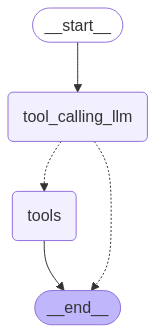

In [15]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_1rxf)
 Call ID: call_1rxf
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, based
solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine translation tasks show these models

In [17]:
messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_v6w7)
 Call ID: call_v6w7
  Args:
    query: recent AI news
  arxiv (call_49xm)
 Call ID: call_49xm
  Args:
    query: quantum computing
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The latest AI news we announced in March - Google Blog", "url": "https://blog.google/technology/ai/google-ai-updates-march-2025/", "content": "Press corner\n\nRSS feed\n\nSubscribe\nBreadcrumb\n\n\nTechnology\nAI\n\nThe latest AI news we announced in March\nApr 04, 2025\n·4 min read\nShare\nTwitterFacebookLinkedInMail\nCopy link\nHere’s a recap of some of our biggest AI updates from March, including Gemini 2.5 Pro, expanded